# Model Building

## Overview

Recall that our **research quesiton** is:

Building **classifier models** for patients **baseline diagnosis** using patients **brain MRI data from their first visits**, adjusting for basic **demographic information**.

And that our **outcome variable** is **patients’ baseline diagnosis ( *DX_bl* )** that has 3 categories: 
- **CN:** the control subjects in the ADNI study. They show no signs of depression, mild cognitive impairment or dementia.
- **LMCI:** subjects that suffers from light cognitive impairment
- **AD:** participants that have been evaluated and meet the NINCDS/ADRDA criteria for probable AD

**(1) Base models**

Based on the **base set** that is extracted from **Adnimerge (ADNIMERGE.csv)**, we built **base models** including only the **4 demographic features**:

- age
- gender
- education level
- marriage status

The goal for building base model is to compare how MRI features can improve the classification accuracy of the models, thus， several basic raw models were attempted:

- decision tree	*(max_depth=20)*
- knn	*(n_neighbors=2)*
- lda	
- qda	
- unweighted logistic	*(multi_class= 'ovr')*
- unweighted logistic with quadratic terms	*(multi_class= 'ovr')*
- weighted logistic	
- weighted logistic with quadratic terms

**(2) Final models**

Based on the **final set** that is the combination of **Adnimerge (ADNIMERGE.csv)** and **UPENN(UPENNROI_MARS_06_01_16.csv)**, we built **final models** including both the **4 demographic features** and the extra **83 imaging features**. 

Except for predicting outcome with **high accuracy**, we also wish to dive deeper into the **association between imaging predictors and outcome**, thus more complicated models were attempted, and key **parameters were tuned by cross-validation**:

- tree-based models:
 - adaboost	  *(depth=1, tree_number=80, learning rate=0.05)*
 - decision tree	*(maximum depth:  5)*
 - random forest    *(via GridSearchCV)*
- non-parametric model:
 - knn	*(k=10)*
- linear and quadratic models:
 - lda	
 - qda		
 - unweighted logistic	*(cv)*
 - unweighted logistic with quadratic terms	   *(cv)*
 - weighted logistic	*(cv)*
 - weighted logistic with quadratic terms   *(cv)*

The **results** among these different models **were compared**. 

We also compared the **importance of different predictors** from tree-based models, and a **branch graph** was generated.


## Data Preprocessing 

- All **categorical** precidtors were converted into **indicator** variables.
- Our final data set doesn't suffer from serious missing data problem (Figure 1), and we **impute** all the missing values with **mean**.
- Variables were **standardized**. 
- whole data set (**762 observations**) were randomly **splitted** into test and training set (**test: training = 1:3**)

Figure 1. **Missing data distribution**

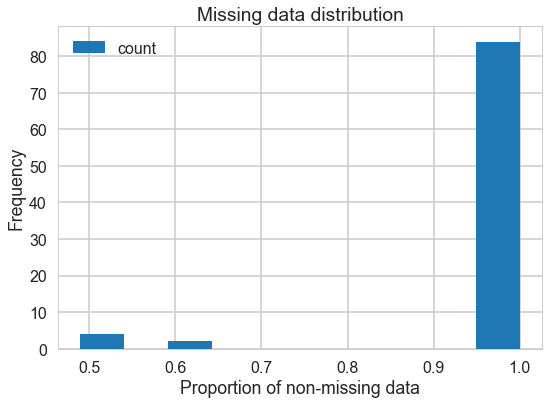

In [7]:
dfcount = pd.DataFrame(df.describe(include='all').iloc[0,:])
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.hist(dfcount['count']/762)

ax.set_xlabel('Proportion of non-missing data')
ax.set_ylabel('Frequency')
ax.set_title('Missing data distribution')
ax.legend()
plt.tight_layout()
plt.show() 

## Base Models
### Training Accuracies for Base Models

In [19]:
df_eva_train

,decision tree,knn,lda,qda,unweighted logistic,unweighted logistic with quadratic terms,weighted logistic,weighted logistic with quadratic terms
overall accuracy,0.971831,0.705986,0.485915,0.489437,0.485915,0.492958,0.482394,0.508803
accuracy on AD,0.992248,0.992248,0.023256,0.069767,0.023256,0.124031,0.255814,0.271318
accuracy on class CN,0.987342,0.772152,0.126582,0.310127,0.113924,0.094937,0.310127,0.322785
accuracy on class LMCI,0.953737,0.537367,0.900356,0.782918,0.907473,0.886121,0.683274,0.722420


### Test Accuracies for Base Models

In [21]:
df_eva_test

,decision tree,knn,lda,qda,unweighted logistic,unweighted logistic with quadratic terms,weighted logistic,weighted logistic with quadratic terms
overall accuracy,0.371134,0.402062,0.463918,0.448454,0.453608,0.453608,0.402062,0.422680
accuracy on AD,0.319149,0.489362,0.042553,0.042553,0.021277,0.042553,0.191489,0.148936
accuracy on class CN,0.326923,0.519231,0.038462,0.211538,0.038462,0.057692,0.250000,0.307692
accuracy on class LMCI,0.421053,0.294737,0.905263,0.778947,0.894737,0.873684,0.589474,0.621053


### Summary
- (1)Overfitting models
 - knn
 - decisoin trees
We can see, the training accuracy of tree-based model and non-parametric model above are significantly higher than other models, but the test accuracy of them are lower than others. This idicating overfitting problem, informing us to fine-tune the parameters of final models.


- (2) **Overall test accuraccy** of all base models **centered at 0.4**, which is low.



- (3) Test accuraccy on **class LMCI is much higher** than AD and CN, however, we are more interested in test accuracy on AD. This give us hints to use **weighted method to put more weight on AD**, which has smallest protion in the three classes.

## Final models
### Training Accuracy for Final Models

In [23]:
df_eva_train

,adaboost,decision tree,knn,lda,qda,random forest,unweighted logistic,unweighted logistic with quadratic terms,weighted logistic,weighted logistic with quadratic terms
overall accuracy,0.600352,0.647887,0.630282,0.709507,0.795775,0.869718,0.683099,0.948944,0.642606,0.977113
accuracy on AD,0.279070,0.806202,0.364341,0.635659,1.000000,0.767442,0.418605,0.821705,0.759690,0.953488
accuracy on class CN,0.310127,0.854430,0.639241,0.683544,0.272152,0.759494,0.683544,0.962025,0.841772,0.955696
accuracy on class LMCI,0.911032,0.459075,0.747331,0.758007,0.996441,0.978648,0.804270,1.000000,0.476868,1.000000


### Test Accuracy for Final Models

In [24]:
df_eva_test

,adaboost,decision tree,knn,lda,qda,random forest,unweighted logistic,unweighted logistic with quadratic terms,weighted logistic,weighted logistic with quadratic terms
overall accuracy,0.556701,0.494845,0.515464,0.608247,0.484536,0.613402,0.613402,0.489691,0.587629,0.500000
accuracy on AD,0.191489,0.404255,0.148936,0.404255,0.000000,0.255319,0.276596,0.234043,0.659574,0.297872
accuracy on class CN,0.250000,0.826923,0.538462,0.730769,0.000000,0.557692,0.576923,0.615385,0.846154,0.596154
accuracy on class LMCI,0.905263,0.357895,0.684211,0.642105,0.989474,0.821053,0.800000,0.547368,0.410526,0.547368


### Summary
- **(1) weighted methods** fitts **better** for this unbalanced data set (*Figure 2*):

**Weighted logistic** classifier has the **highest test accuracy on AD**, this is because the proportion of the three classes are heavily unbalnced, where **AD has the smallest portion** and **LMCI has the largest portion**.

- **(2) linear methods** can **better** describe association between MRI data and diagnosis (*Figure 2*):
 - The test accuraccy on **lda(linear**) is much **higher than qda(quadratic)**; 
 - The test accuraccy on **(weighted) linear logistic** is much **higher than (weighted) quadratic logistic**;
 
This result indicating that MRI and diagnosis **are more likely to follow linear relationship**. 

- **(3) Overall** test accuracy **varies much less** than **seperate** accuracy accross different classifiers, we can select different classifier according to specific need (*Figure 3*):
 - **To better predict AD:** **weighted logistic** > lda = decision tree
 - **To better predict CN:** **weighted logistic** ~ decision tree > lda
 - **To better predict LMCI:** qda ~ adaboost > random forest ~ **weighted logistic**
 
Based on test accuracy on all the three classes seperately, we strongly recommend **weighted logistic** classifier.

Figure 2. **Heatmap for Predictive Accuracies of Models**

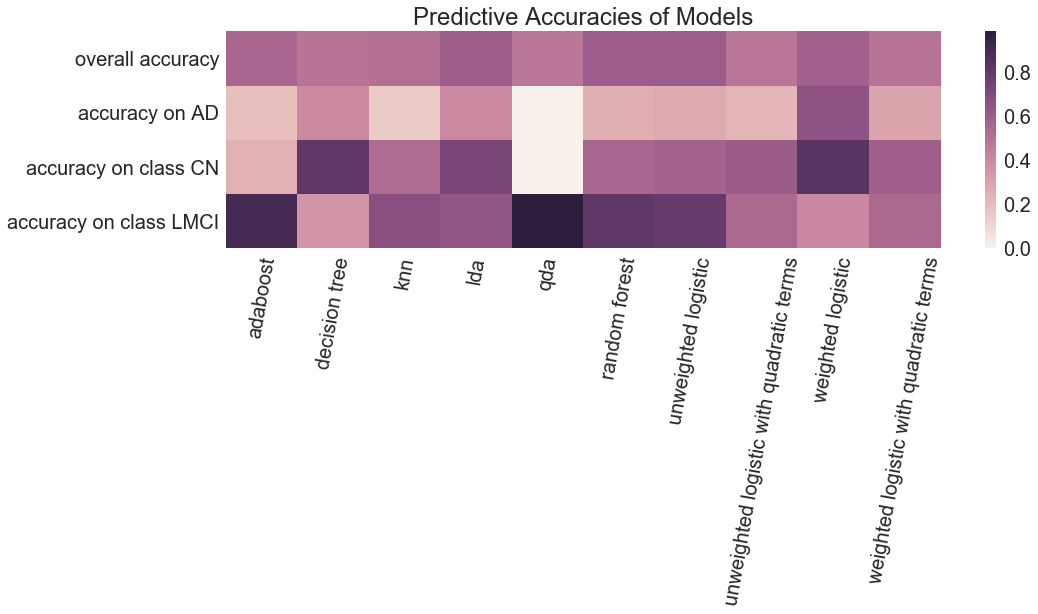

In [25]:
plt.figure(figsize=(16,4))
sns.set(font_scale=2)
sns.heatmap(df_eva_test)
plt.xticks(rotation=80)
plt.title("Predictive Accuracies of Models");

Figure 3. **Scatter plot for Predictive Accuracies of Models**

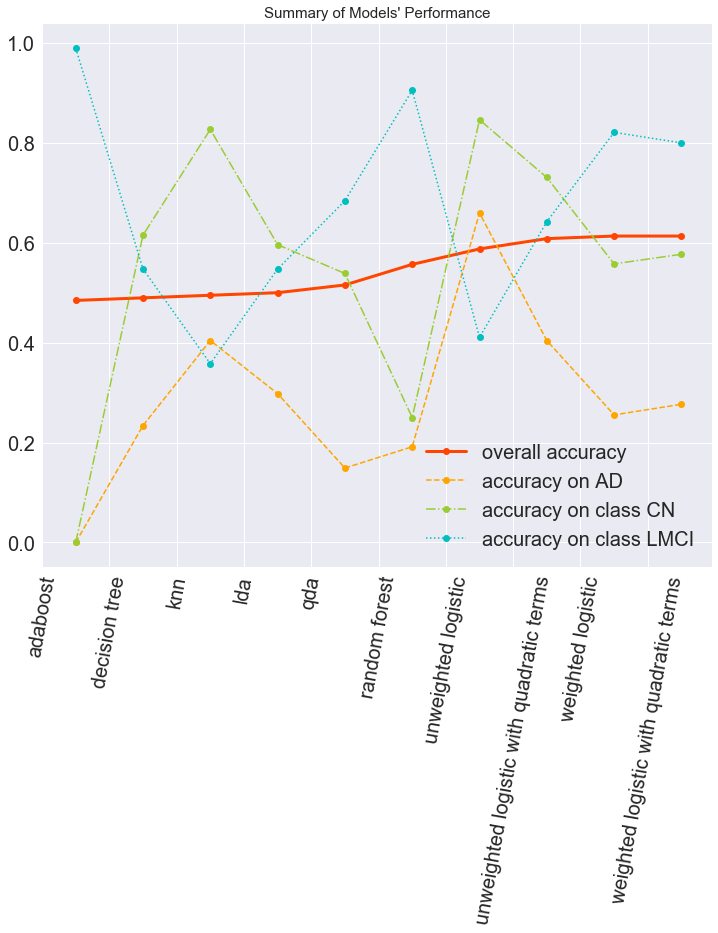

In [42]:
colors={"overall accuracy":"orangered","accuracy on AD":"orange","accuracy on class CN":"yellowgreen", "accuracy on class LMCI":"c"}
linewidths=[3,1.5,1.5,1.5]
linestyles = ['-', '--', '-.', ':']
fig, ax = plt.subplots(1,1,figsize=(12,10))
for i in range(0,4):
    col=df_eva_test.T.sort_values(by="overall accuracy").columns[i]
    ax.plot(np.arange(1,11),df_eva_test.T.sort_values(by="overall accuracy").iloc[:,i],color=colors[col],marker="o",\
             linewidth=linewidths[i],linestyle=linestyles[i],label=col)
ax.set_title("Summary of Models' Performance",fontsize=15)
plt.xticks(pos, df_eva_test.columns, rotation=80)
plt.legend();

### Importance of variables

Based on the importance sequence generated by two different tree-based classifier, we can see:

- **Hippocampus** is the **most important** predictor for cognitive impairment diagnosis
- **Age** also plays an important role in the prediction, and should be adjusted when analysing imaging data.
- **Middle Cingulate Gyrus**, **Middle Temporal Gyrus** and **Angular Gyrus** are also important predictors


Figure 4. **Top 10 Important Variables Given By Decision Tree Classifier**

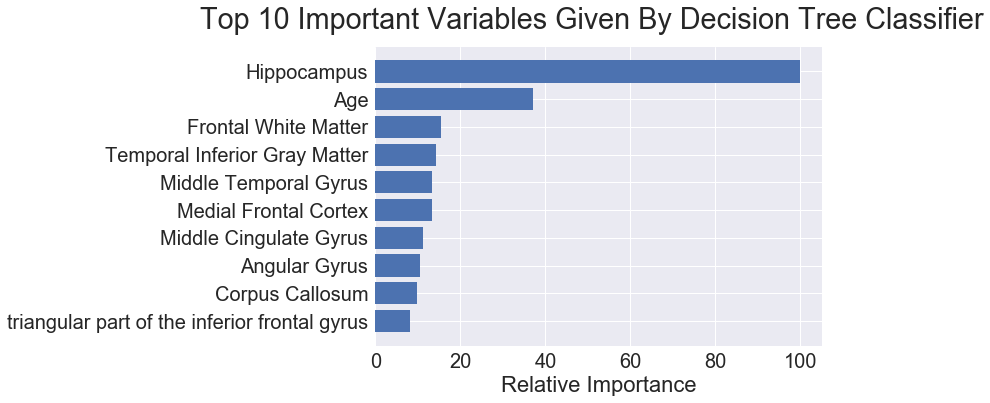

In [30]:
feature_importance = tree.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5

x_train = pd.concat((df_train_std, df_train[['PTGENDER','PTEDUCAT']], df_train.iloc[:,-4:]), axis=1, join_axes=[df_train_std.index])
#print(x_train.columns[sorted_idx][-10:])
variable_name = ["triangular part of the inferior frontal gyrus","Corpus Callosum","Angular Gyrus","Middle Cingulate Gyrus", "Medial Frontal Cortex","Middle Temporal Gyrus", "Temporal Inferior Gray Matter","Frontal White Matter","Age", "Hippocampus"]

plt.suptitle("Top 10 Important Variables Given By Decision Tree Classifier")
plt.barh(pos[:10], list(feature_importance[sorted_idx][-10:]), align='center')
plt.yticks(pos, variable_name)
plt.xlabel('Relative Importance')
plt.show()

Figure 5. **Top 10 Important Variables Given By Random Forest Classifier**

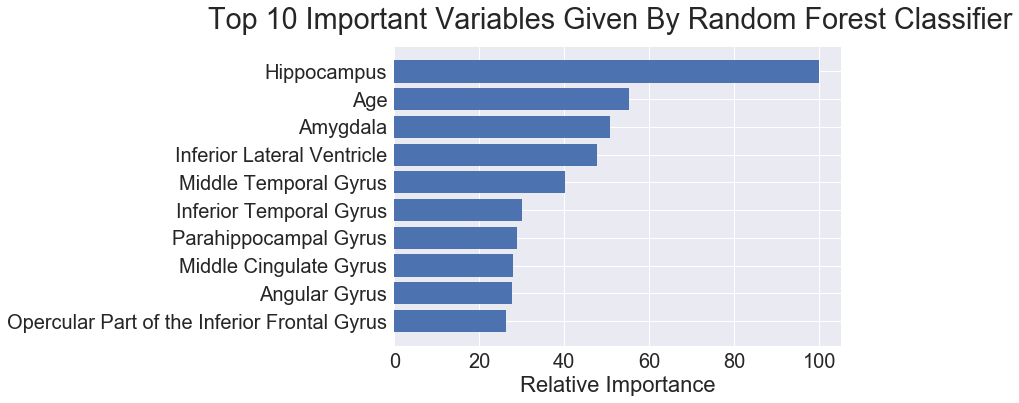

In [37]:
rf = RandomForestClassifier(max_features= 0.4, n_estimators=70, max_depth = 10)
rf.fit(x_train,y_train)
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5

#print(x_train.columns[sorted_idx][-10:])
variable_name = ["Opercular Part of the Inferior Frontal Gyrus","Angular Gyrus","Middle Cingulate Gyrus","Parahippocampal Gyrus","Inferior Temporal Gyrus", "Middle Temporal Gyrus", "Inferior Lateral Ventricle","Amygdala","Age", "Hippocampus"]

plt.suptitle("Top 10 Important Variables Given By Random Forest Classifier")
plt.barh(pos, list(feature_importance[sorted_idx][-10:]), align='center')
plt.yticks(pos, variable_name)
plt.xlabel('Relative Importance')

plt.show()

Figure 6. **Tree graph for important predictors**

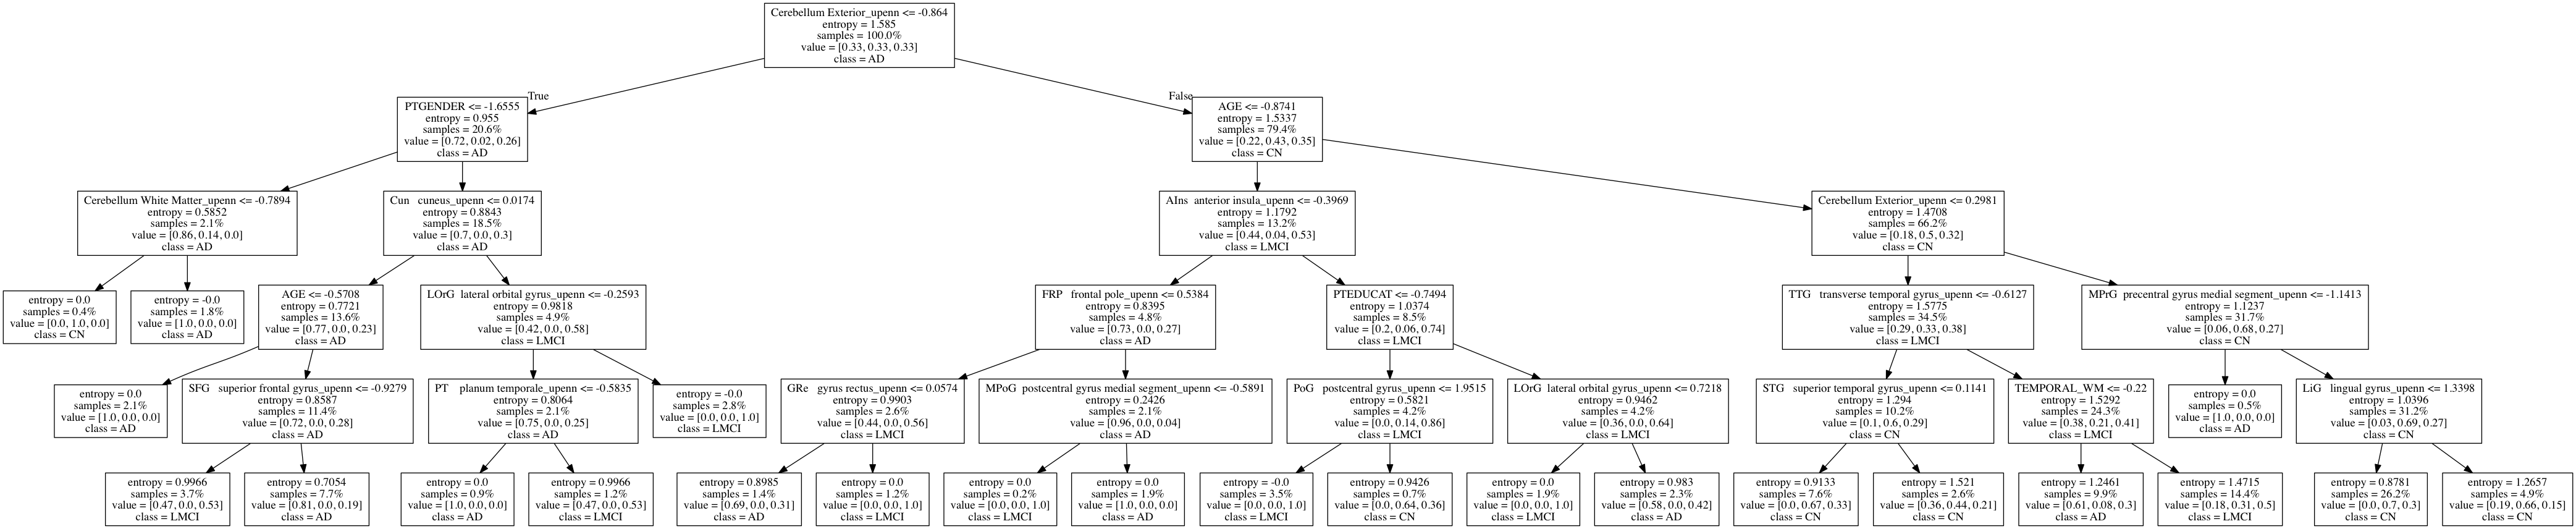

In [41]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from IPython.display import display
from sklearn.tree import export_graphviz

drop_list = ['RID','DX_bl','PTETHCAT','Ventricles','Hippocampus','WholeBrain','Entorhinal','Fusiform','MidTemp']

dot_data = StringIO()
export_graphviz(tree, out_file = dot_data, feature_names =list(df_train.drop(drop_list,axis = 1).columns), class_names = ["AD", "CN", "LMCI"],proportion=True) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

## Final-Base Model Comparing

By comparing base models and final models, we can see:

MRI data significantly increase the test accuracy of all the models.